# **Dependicies**

In [15]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


# **Data Import and check**

In [22]:
df = pd.read_csv('fake_bills.csv',sep=";")

In [23]:
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [24]:
df.shape

(1500, 7)

# Summary statistics analysis

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [26]:
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


# **Identifying for missing/NULL Values**

In [27]:
df.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

# Handling Missing Values (Mean/Mode)

In [28]:
df_1 = df
cols = df_1.columns
for col in cols:
  if df_1[col].dtype == 'O':
    df_1[col].fillna(value=df_1[col].mode()[0],inplace=True)
  else:
    df_1[col].fillna(value=df_1[col].mean(),inplace=True)

C:\Users\AARIB\AppData\Local\Temp\ipykernel_5012\973902352.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_1[col].fillna(value=df_1[col].mean(),inplace=True)


In [29]:
df_1.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

# **Dividing Data into X and y**

In [30]:
X = df_1[['diagonal', 'height_left', 'height_right', 'margin_low','margin_up', 'length']]
X.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.46,103.36,103.66,3.77,2.99,113.09
2,172.69,104.48,103.50,4.40,2.94,113.16
3,171.36,103.91,103.94,3.62,3.01,113.51
4,171.73,104.28,103.46,4.04,3.48,112.54


# Scaling it for better performance

In [31]:
X=(X-X.min()) / (X.max()- X.min()).values
X.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
0,0.390863,0.988506,1.000000,0.392857,0.378049,0.674747
1,0.213198,0.126437,0.394366,0.201531,0.439024,0.727273
2,0.837563,0.770115,0.319249,0.362245,0.408537,0.741414
3,0.162437,0.442529,0.525822,0.163265,0.451220,0.812121
4,0.350254,0.655172,0.300469,0.270408,0.737805,0.616162


# Handling Categorical Values

In [32]:
df_1.is_genuine=[1 if i == True else 0 for i in df_1.is_genuine]

In [33]:
y = df_1['is_genuine']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: is_genuine, dtype: int64

Our Y was in text, we need to make it an integer for our model to predict

# **Spliting Data in traing and testing**

In [34]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=53)

# **Classification Algorithms**

**Logistic Regression**

In [35]:
logReg=LogisticRegression()
logReg.fit(x_train,y_train)

LogisticRegression()

# **Evaluating Model**

In [36]:
y_pred = logReg.predict(x_test)

In [37]:
from sklearn.metrics import classification_report
print("Accuracy = ",accuracy_score(y_test,y_pred),"\n")
print(classification_report(y_test,y_pred))

Accuracy =  0.99 

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        94
           1       0.99      1.00      0.99       206

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



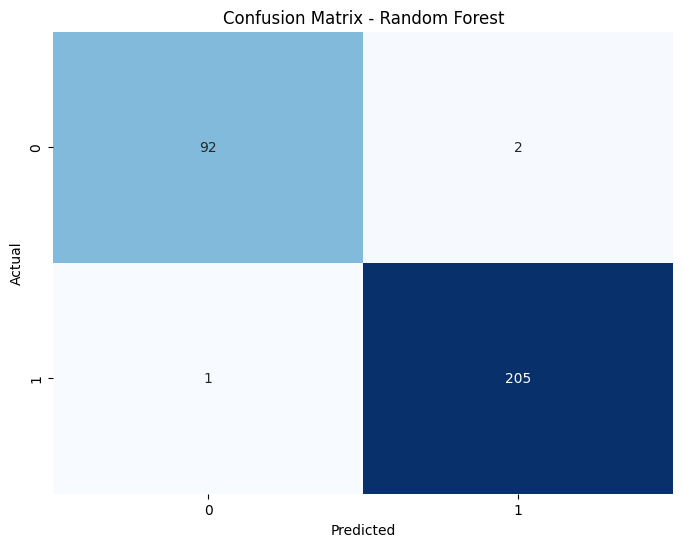

In [40]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix_rfc = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rfc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Decision Trees**

Accuracy =  0.9833333333333333 

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        94
           1       0.99      0.99      0.99       206

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



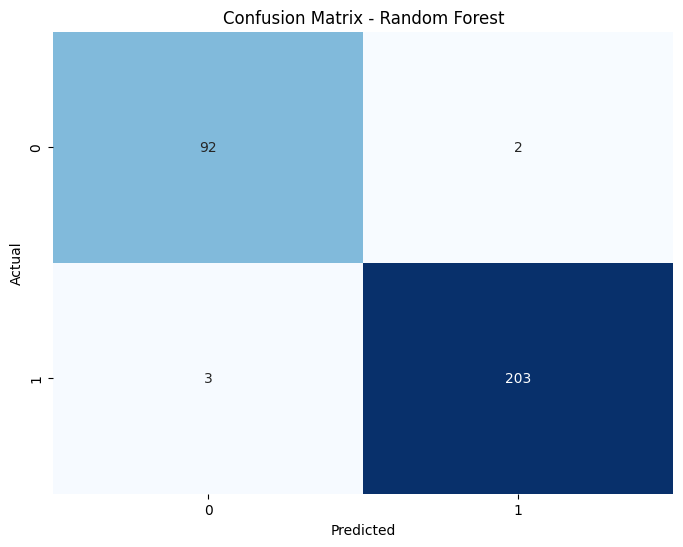

In [42]:
trees = DecisionTreeClassifier()
trees.fit(x_train,y_train)

ypredtree = trees.predict(x_test)

print("Accuracy = ",accuracy_score(y_test,ypredtree),"\n")
print(classification_report(y_test,ypredtree))

conf_matrix_rfc = confusion_matrix(y_test, ypredtree)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rfc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy =  0.99 

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        94
           1       1.00      0.99      0.99       206

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



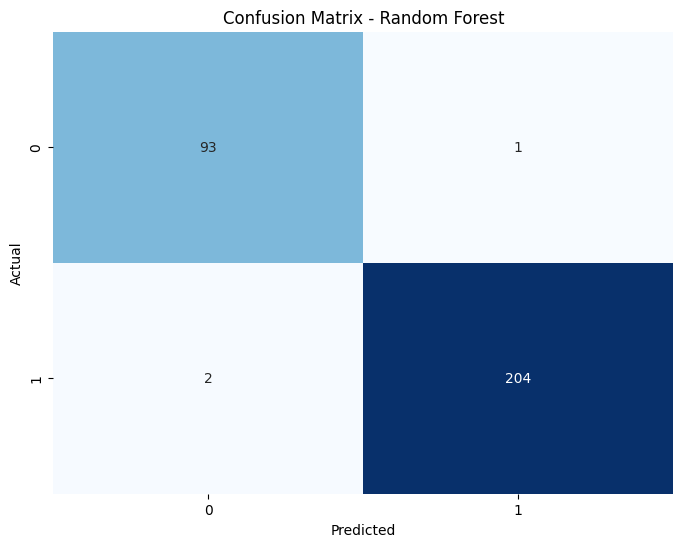

In [43]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

ypreedknn = knn.predict(x_test)

print("Accuracy = ",accuracy_score(y_test,ypreedknn),"\n")
print(classification_report(y_test,ypreedknn))

conf_matrix_rfc = confusion_matrix(y_test, ypreedknn)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rfc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**As we can see both Logistic Regreesion and K nearest Neighbours have the best clasfication accuracy, Even thier precisions are almost equal, providing that these are suitable algorithms of classifying fake bills**